<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-HW-3/blob/main/ML_Zoomcamp_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning ZoomCamp - Homework 3 
**Author.....: Carlos Manuel de Oliveira Alves**<br>
**Created...: 26/09/2022**

In [64]:
# Import all necessay libraries that we will use in this homework
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import the library warnings to ignore the warnings from the system
import warnings
warnings.filterwarnings("ignore")

##Data Import

In [65]:
# Create list with the columns to be used with the dataset
usecols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity']

In [66]:
# Locate dataset for the homework
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [67]:
# Download dataset and store it locally with different file name
!wget $data -O data.csv

--2022-09-26 16:57:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2022-09-26 16:57:12 (158 MB/s) - ‘data.csv’ saved [1423529/1423529]



In [68]:
# Store only the features we need for this homework
data = pd.read_csv('data.csv', usecols=usecols)

In [69]:
# Check total of rows and columns of the dataset
print(data.shape)

(20640, 10)


In [70]:
# Check the first 10 rows of the dataset
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [71]:
# Check how many missing values we have with dataset
missingValues = data.isnull().sum()
missingValues

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [72]:
# Select only the features from above and fill in the missing values with 0
data = data.fillna(0)

In [73]:
# Check how many missing values we have with dataset after filled the missing values
missingValues = data.isnull().sum()
missingValues

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [74]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe
data['rooms_per_household'] = data['total_rooms'].values / data['households'].values

# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe
data['bedrooms_per_room'] = data['total_bedrooms'].values / data['total_rooms'].values

# Create a new column population_per_household by dividing the column population by the column households from dataframe
data['population_per_household'] = data['population'].values / data['households'].values

In [75]:
# Check the first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


##Question 1

**What is the most frequent observation (mode) for the column ocean_proximity?**

In [76]:
# Descriptive statistic of the dataset only for objects
data.describe(include=['O'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [77]:
# Another method to find the most frequent observation
data['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

###Answer for Question N.1: <1H OCEAN

##Question 2

In [78]:
# Create the correlation matrix for the numerical features of your train dataset

# Make a copy of the original dataset
data_numeric = data.copy()

# Use the function info to get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [79]:
# Make the new dataframe contains only the numerical features
data_numeric = data.drop(['ocean_proximity'], axis=1)
data_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


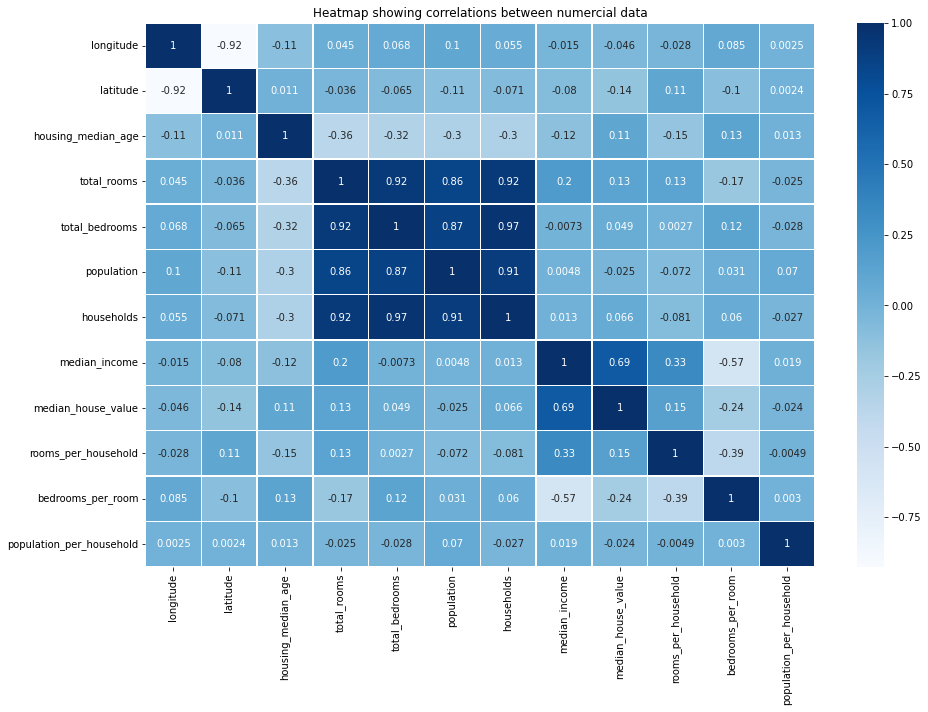

In [80]:
# Plot heatmap with the correlation between numerical data
plt.figure(figsize=(15,10))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5,cmap='Blues')
plt.title('Heatmap showing correlations between numercial data')
plt.show()

In [81]:
# Another method to have the correlation between numerical data
data_numeric.corr().unstack().sort_values(ascending=False)

longitude            longitude              1.000000
latitude             latitude               1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_house_value   median_house_value     1.000000
                                              ...   
bedrooms_per_room    rooms_per_household   -0.387465
                     median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
longitude            latitude              -0.924664
latitude             longitude             -0.924664
Length: 144, dtype: float64

###Answer for Question N.2: total_bedrooms and households

In [82]:
# We need to turn the median_house_value variable from numeric into binary

# Let's create a variable above_average which is 1 if the median_house_value is above 
# its mean value and 0 otherwise

# Make a copy of the original dataset
data_class = data.copy()

# Calculate the mean of median_house_value
mean = data_class['median_house_value'].mean()

# Create a variable above_average which is 1 if the median_house_value is above 
data_class['above_average'] = np.where(data_class['median_house_value'] >= mean,1,0)

# Delete the feature median house from the dataframe
data_class = data_class.drop('median_house_value', axis=1)

In [83]:
# Import the library sklearn with the homework
from sklearn.model_selection import train_test_split

In [84]:
# Define the sizes of the datasets with 20% and use random state so the results are reproducible

# Split the full train dataframe with 80% and the test 20% and set the seed to 42
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [85]:
# Split the full train dataframe in train and validation dataframes
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [86]:
# Reset the indexes of train, validation and test dataframes
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [87]:
# Get the above_average feature from train, validation and test dataframes
y_train = df_train.above_average.values
y_val   = df_val.above_average.values
y_test  = df_test.above_average.values

In [88]:
# Delete the feature above_average from the dataframes: train, validation and test
#del df_train['above_average']
#del df_val['above_average']
#del df_test['above_average']

##Question 3

##Mutual information

In [89]:
# Use scikit-learn to implements mutual information
from sklearn.metrics import mutual_info_score

In [105]:
# Define function to calculate the MI
def calculate_mi(series):
  return mutual_info_score(series, df_train.above_average)

# Use the function apply with mutual info churn score and with categorical variables
df_mi = df_train[['ocean_proximity']].apply(calculate_mi)

# Use sort values function with the result of the mutual information in descending order
df_mi = round(df_mi.sort_values(ascending=False).to_frame(name='MI'),2)
df_mi

,MI
ocean_proximity,0.1


###Answer for Question N.3: 0.10

##Question 4

In [107]:
# Implemeting one hot encoding using dictionaries vectorizer
from sklearn.feature_extraction import DictVectorizer

# Use linear models package from Scikit-Learn
from sklearn.linear_model import LogisticRegression

# Use metrics package from Scikit-Learn
from sklearn.metrics import accuracy_score

In [108]:
# Create train dictionary coming from the train dataframe using the categorical variables
train_dicts = df_train[['ocean_proximity']].to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv.fit(train_dicts)

# Use the function transform with our DictVectorizer
X_train = dv.transform(train_dicts)

In [111]:
# Create a model logistic regression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

# For training the model we use the fit method
model.fit(X_train, y_train)

# Create val dictionary coming from the validation dataframe using the categorical variables
val_dicts = df_val[['ocean_proximity']].to_dict(orient='records')

# Use the function transform with our DictVectorizer
X_val = dv.transform(val_dicts)

# Use the model with function predict on our validation dataframe
y_pred = model.predict(X_val)

# Calculate the accuracy on the validation dataset and round it to 2 decimal digits
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.66


###Answer for Question N.4: 0.66

##Question 5

In [ ]:
#
orig_score = accuracy

# 
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity']

# 
for c in features:
  
  # 
  subset = features.copy()
  subset.remove(c)

  # Create train dictionary coming from the train dataframe using the categorical variables
  train_dicts = df_train[[subset]].to_dict(orient='records')

  # Create a new instance of the DictVectorizer class without sparse
  dv = DictVectorizer(sparse=False)

  # Use the method fit and first we train our DictVectorizer
  dv.fit(train_dicts)

  # Use the function transform with our DictVectorizer
  X_train = dv.transform(train_dicts)